In [1]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from xgboost import plot_importance
from seaborn import regplot 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [2]:
feature_train = pd.read_csv('./earthquake/train_values.csv')
feature_target = pd.read_csv('./earthquake/train_labels.csv')

In [3]:
feature_train.head(5)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [4]:
feature_train = feature_train.drop(columns='building_id')
feature_target = feature_target.drop(columns='building_id')

In [5]:
feature_train.head(5)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
1,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,0
2,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
3,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
4,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,0


In [6]:
feature_train['land_surface_condition'] = feature_train['land_surface_condition'].astype('category')
feature_train['land_surface_condition'] = feature_train['land_surface_condition'].cat.codes

feature_train['foundation_type'] = feature_train['foundation_type'].astype('category')
feature_train['foundation_type'] = feature_train['foundation_type'].cat.codes

feature_train['roof_type'] = feature_train['roof_type'].astype('category')
feature_train['roof_type'] = feature_train['roof_type'].cat.codes

feature_train['ground_floor_type'] = feature_train['ground_floor_type'].astype('category')
feature_train['ground_floor_type'] = feature_train['ground_floor_type'].cat.codes

feature_train['other_floor_type'] = feature_train['other_floor_type'].astype('category')
feature_train['other_floor_type'] = feature_train['other_floor_type'].cat.codes

feature_train['position'] = feature_train['position'].astype('category')
feature_train['position'] = feature_train['position'].cat.codes

feature_train['plan_configuration'] = feature_train['plan_configuration'].astype('category')
feature_train['plan_configuration'] = feature_train['plan_configuration'].cat.codes

feature_train['legal_ownership_status'] = feature_train['legal_ownership_status'].astype('category')
feature_train['legal_ownership_status'] = feature_train['legal_ownership_status'].cat.codes


In [7]:
feature_train.dtypes

geo_level_1_id                            int64
geo_level_2_id                            int64
geo_level_3_id                            int64
count_floors_pre_eq                       int64
age                                       int64
area_percentage                           int64
height_percentage                         int64
land_surface_condition                     int8
foundation_type                            int8
roof_type                                  int8
ground_floor_type                          int8
other_floor_type                           int8
position                                   int8
plan_configuration                         int8
has_superstructure_adobe_mud              int64
has_superstructure_mud_mortar_stone       int64
has_superstructure_stone_flag             int64
has_superstructure_cement_mortar_stone    int64
has_superstructure_mud_mortar_brick       int64
has_superstructure_cement_mortar_brick    int64
has_superstructure_timber               

In [8]:
feature_train.head(5)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,6,487,12198,2,30,6,5,2,2,0,...,0,0,0,0,0,0,0,0,0,0
1,8,900,2812,2,10,8,7,1,2,0,...,0,0,0,0,0,0,0,0,0,0
2,21,363,8973,2,10,5,5,2,2,0,...,0,0,0,0,0,0,0,0,0,0
3,22,418,10694,2,10,6,5,2,2,0,...,0,0,0,0,0,0,0,0,0,0
4,11,131,1488,3,30,8,9,2,2,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
model = XGBClassifier(n_estimators=2200)
model.fit(feature_train,feature_target.values.ravel())

KeyboardInterrupt: 

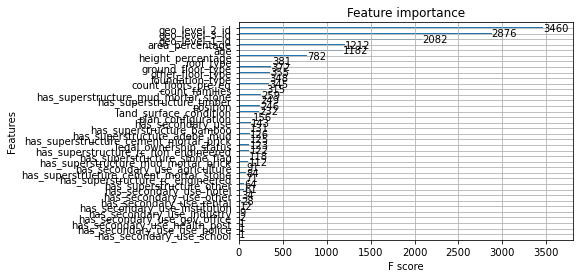

In [10]:
plot_importance(model)
plt.show()

In [11]:
targets_train = pd.read_csv('./earthquake/test_values.csv')
HouseID = targets_train['building_id']

In [12]:
targets_train = targets_train.drop(columns='building_id')

In [13]:
targets_train['land_surface_condition'] = targets_train['land_surface_condition'].astype('category')
targets_train['land_surface_condition'] = targets_train['land_surface_condition'].cat.codes

targets_train['foundation_type'] = targets_train['foundation_type'].astype('category')
targets_train['foundation_type'] = targets_train['foundation_type'].cat.codes

targets_train['roof_type'] = targets_train['roof_type'].astype('category')
targets_train['roof_type'] = targets_train['roof_type'].cat.codes

targets_train['ground_floor_type'] = targets_train['ground_floor_type'].astype('category')
targets_train['ground_floor_type'] = targets_train['ground_floor_type'].cat.codes

targets_train['other_floor_type'] = targets_train['other_floor_type'].astype('category')
targets_train['other_floor_type'] = targets_train['other_floor_type'].cat.codes

targets_train['position'] = targets_train['position'].astype('category')
targets_train['position'] = targets_train['position'].cat.codes

targets_train['plan_configuration'] = targets_train['plan_configuration'].astype('category')
targets_train['plan_configuration'] = targets_train['plan_configuration'].cat.codes

targets_train['legal_ownership_status'] = targets_train['legal_ownership_status'].astype('category')
targets_train['legal_ownership_status'] = targets_train['legal_ownership_status'].cat.codes


In [14]:
targets_pred = model.predict(targets_train)

In [15]:
result = pd.DataFrame({'building_id':HouseID,'damage_grade':targets_pred})

In [16]:
result.dtypes

building_id     int64
damage_grade    int64
dtype: object

In [17]:
result.to_csv('finalresult.csv')